# Hamisi Soipan 666719
source code--> https://github.com/soipanhamisi/KNN_Classification_Regression_Analysis/blob/master/notebooks/tree-based-modelling.ipynb

# <span style="color: #b0f542">Task 1: COVID-19 Risk Classification </span>

### **Objective**
Predict whether an individual is likely to contract COVID-19 using the provided dataset.

### **Requirements**
- Use **Random Forest Classifier** and **Gradient Boosted Classifier** to build predictive models.
- Evaluate the models and provide **comparative insights** into their performance.
- Analyze **feature importance** and discuss the **practical implications** of the models.


In [1]:
import pandas as pd

In [143]:
covid_ds = pd.read_csv(filepath_or_buffer="datasets/coronavirusdataset.csv")

In [144]:
covid_ds.head(5)

,batch_date,test_name,swab_type,covid19_test_results,age,high_risk_exposure_occupation,high_risk_interactions,diabetes,chd,htn,...,headache,loss_of_smell,loss_of_taste,runny_nose,muscle_sore,sore_throat,cxr_findings,cxr_impression,cxr_label,cxr_link
0,2020-10-20,"SARS-CoV-2, NAA",Nasal,Negative,39,False,NaN,False,False,False,...,False,False,False,False,False,False,NaN,NaN,NaN,NaN
1,2020-10-20,COVID-19 PCR External Result,Nasal,Negative,56,False,NaN,False,False,False,...,False,False,False,False,False,False,NaN,NaN,NaN,NaN
2,2020-10-20,Rapid COVID-19 PCR Test,Nasal,Negative,35,False,NaN,False,False,False,...,False,False,False,False,False,False,NaN,NaN,NaN,NaN
3,2020-10-20,Rapid COVID-19 PCR Test,Nasal,Negative,37,False,NaN,False,False,False,...,False,False,False,False,False,False,NaN,NaN,NaN,NaN
4,2020-10-20,Rapid COVID-19 PCR Test,Nasal,Negative,42,False,NaN,False,False,False,...,False,False,False,False,False,False,NaN,NaN,NaN,NaN


In [145]:
covid_ds

,batch_date,test_name,swab_type,covid19_test_results,age,high_risk_exposure_occupation,high_risk_interactions,diabetes,chd,htn,...,headache,loss_of_smell,loss_of_taste,runny_nose,muscle_sore,sore_throat,cxr_findings,cxr_impression,cxr_label,cxr_link
0,2020-10-20,"SARS-CoV-2, NAA",Nasal,Negative,39,False,NaN,False,False,False,...,False,False,False,False,False,False,NaN,NaN,NaN,NaN
1,2020-10-20,COVID-19 PCR External Result,Nasal,Negative,56,False,NaN,False,False,False,...,False,False,False,False,False,False,NaN,NaN,NaN,NaN
2,2020-10-20,Rapid COVID-19 PCR Test,Nasal,Negative,35,False,NaN,False,False,False,...,False,False,False,False,False,False,NaN,NaN,NaN,NaN
3,2020-10-20,Rapid COVID-19 PCR Test,Nasal,Negative,37,False,NaN,False,False,False,...,False,False,False,False,False,False,NaN,NaN,NaN,NaN
4,2020-10-20,Rapid COVID-19 PCR Test,Nasal,Negative,42,False,NaN,False,False,False,...,False,False,False,False,False,False,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7289,2020-10-20,COVID-19 PCR External Result,Nasal,Negative,26,False,NaN,False,False,False,...,False,False,False,False,False,False,NaN,NaN,NaN,NaN
7290,2020-10-20,"SARS-CoV-2, NAA",Nasal,Negative,29,False,False,False,False,False,...,False,False,False,False,False,False,NaN,NaN,NaN,NaN
7291,2020-10-20,"SARS-CoV-2, NAA",Nasal,Negative,33,False,NaN,False,False,False,...,False,False,False,False,False,False,NaN,NaN,NaN,NaN
7292,2020-10-20,Rapid COVID-19 PCR Test,Nasal,Negative,46,False,False,False,False,False,...,False,False,False,False,False,False,NaN,NaN,NaN,NaN


In [146]:
covid_ds.columns

Index(['batch_date', 'test_name', 'swab_type', 'covid19_test_results', 'age',
       'high_risk_exposure_occupation', 'high_risk_interactions', 'diabetes',
       'chd', 'htn', 'cancer', 'asthma', 'copd', 'autoimmune_dis', 'smoker',
       'temperature', 'pulse', 'sys', 'dia', 'rr', 'sats', 'rapid_flu_results',
       'rapid_strep_results', 'ctab', 'labored_respiration', 'rhonchi',
       'wheezes', 'days_since_symptom_onset', 'cough', 'cough_severity',
       'fever', 'sob', 'sob_severity', 'diarrhea', 'fatigue', 'headache',
       'loss_of_smell', 'loss_of_taste', 'runny_nose', 'muscle_sore',
       'sore_throat', 'cxr_findings', 'cxr_impression', 'cxr_label',
       'cxr_link'],
      dtype='object')

## <span style="color:#b0f542">1.1 Feature Engineering</span>
Removing the batch date column since each datapoint is 2020-10-20

In [147]:
covid_ds = covid_ds.drop('batch_date', axis=1)

In [148]:
covid_ds.tail(4)

,test_name,swab_type,covid19_test_results,age,high_risk_exposure_occupation,high_risk_interactions,diabetes,chd,htn,cancer,...,headache,loss_of_smell,loss_of_taste,runny_nose,muscle_sore,sore_throat,cxr_findings,cxr_impression,cxr_label,cxr_link
7290,"SARS-CoV-2, NAA",Nasal,Negative,29,False,False,False,False,False,False,...,False,False,False,False,False,False,NaN,NaN,NaN,NaN
7291,"SARS-CoV-2, NAA",Nasal,Negative,33,False,NaN,False,False,False,False,...,False,False,False,False,False,False,NaN,NaN,NaN,NaN
7292,Rapid COVID-19 PCR Test,Nasal,Negative,46,False,False,False,False,False,False,...,False,False,False,False,False,False,NaN,NaN,NaN,NaN
7293,Rapid COVID-19 PCR Test,Nasal,Negative,53,False,NaN,False,False,True,False,...,False,False,False,False,False,False,NaN,NaN,NaN,NaN


imputing the high_risk_exposure_occupation missing values with the modal value i.e "False"

In [149]:
covid_ds['high_risk_exposure_occupation'] = covid_ds['high_risk_exposure_occupation'].apply(lambda x: False if pd.isna(x) else x)

In [150]:
covid_ds.sample(5)

,test_name,swab_type,covid19_test_results,age,high_risk_exposure_occupation,high_risk_interactions,diabetes,chd,htn,cancer,...,headache,loss_of_smell,loss_of_taste,runny_nose,muscle_sore,sore_throat,cxr_findings,cxr_impression,cxr_label,cxr_link
1209,"SARS-CoV-2, NAA",Nasal,Negative,29,False,NaN,False,False,False,False,...,False,False,False,False,False,False,NaN,NaN,NaN,NaN
6291,"SARS-CoV-2, NAA",Nasal,Negative,59,False,False,False,False,False,False,...,False,False,False,False,False,False,NaN,NaN,NaN,NaN
5621,COVID-19 PCR External Result,Nasal,Negative,26,False,NaN,False,False,False,False,...,False,False,False,False,False,False,NaN,NaN,NaN,NaN
1801,Rapid COVID-19 PCR Test,Nasal,Negative,52,False,NaN,False,False,False,False,...,False,False,False,False,False,False,NaN,NaN,NaN,NaN
4750,Rapid COVID-19 PCR Test,Nasal,Negative,30,False,NaN,False,False,False,False,...,False,False,False,False,False,False,NaN,NaN,NaN,NaN


below we impute the columns 'sats',
    'temperature',
     missing values with their respective averages

In [151]:
cols = [
    'sats',
    'temperature',
]

for c in cols:
    covid_ds[c] = covid_ds[c].fillna(covid_ds[c].mean())


In [152]:
covid_ds.sample(5)

,test_name,swab_type,covid19_test_results,age,high_risk_exposure_occupation,high_risk_interactions,diabetes,chd,htn,cancer,...,headache,loss_of_smell,loss_of_taste,runny_nose,muscle_sore,sore_throat,cxr_findings,cxr_impression,cxr_label,cxr_link
6386,"SARS-CoV-2, NAA",Nasal,Negative,39,False,True,False,False,False,False,...,False,False,False,False,False,False,NaN,NaN,NaN,NaN
1541,"SARS-CoV-2, NAA",Nasal,Negative,51,True,False,False,False,False,False,...,False,False,False,False,False,False,NaN,NaN,NaN,NaN
2627,"SARS-CoV-2, NAA",Nasal,Negative,22,False,False,False,False,False,False,...,False,False,False,False,False,False,NaN,NaN,NaN,NaN
1540,"SARS-CoV-2, NAA",Nasal,Negative,18,False,False,False,False,False,False,...,True,False,False,False,False,True,NaN,NaN,NaN,NaN
2986,"SARS-CoV-2, NAA",Nasal,Negative,44,True,False,False,False,False,False,...,False,True,True,True,True,True,NaN,NaN,NaN,NaN


removing 'cough_severity',
    'sob_severity',
    'days_since_symptom_onset' columns due to too few data points despite their relative importance

In [153]:
covid_ds = covid_ds.drop(['cough_severity',
    'sob_severity',
    'days_since_symptom_onset'], axis=1)
covid_ds

,test_name,swab_type,covid19_test_results,age,high_risk_exposure_occupation,high_risk_interactions,diabetes,chd,htn,cancer,...,headache,loss_of_smell,loss_of_taste,runny_nose,muscle_sore,sore_throat,cxr_findings,cxr_impression,cxr_label,cxr_link
0,"SARS-CoV-2, NAA",Nasal,Negative,39,False,NaN,False,False,False,False,...,False,False,False,False,False,False,NaN,NaN,NaN,NaN
1,COVID-19 PCR External Result,Nasal,Negative,56,False,NaN,False,False,False,False,...,False,False,False,False,False,False,NaN,NaN,NaN,NaN
2,Rapid COVID-19 PCR Test,Nasal,Negative,35,False,NaN,False,False,False,False,...,False,False,False,False,False,False,NaN,NaN,NaN,NaN
3,Rapid COVID-19 PCR Test,Nasal,Negative,37,False,NaN,False,False,False,False,...,False,False,False,False,False,False,NaN,NaN,NaN,NaN
4,Rapid COVID-19 PCR Test,Nasal,Negative,42,False,NaN,False,False,False,False,...,False,False,False,False,False,False,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7289,COVID-19 PCR External Result,Nasal,Negative,26,False,NaN,False,False,False,False,...,False,False,False,False,False,False,NaN,NaN,NaN,NaN
7290,"SARS-CoV-2, NAA",Nasal,Negative,29,False,False,False,False,False,False,...,False,False,False,False,False,False,NaN,NaN,NaN,NaN
7291,"SARS-CoV-2, NAA",Nasal,Negative,33,False,NaN,False,False,False,False,...,False,False,False,False,False,False,NaN,NaN,NaN,NaN
7292,Rapid COVID-19 PCR Test,Nasal,Negative,46,False,False,False,False,False,False,...,False,False,False,False,False,False,NaN,NaN,NaN,NaN


In [154]:
covid_ds.columns

Index(['test_name', 'swab_type', 'covid19_test_results', 'age',
       'high_risk_exposure_occupation', 'high_risk_interactions', 'diabetes',
       'chd', 'htn', 'cancer', 'asthma', 'copd', 'autoimmune_dis', 'smoker',
       'temperature', 'pulse', 'sys', 'dia', 'rr', 'sats', 'rapid_flu_results',
       'rapid_strep_results', 'ctab', 'labored_respiration', 'rhonchi',
       'wheezes', 'cough', 'fever', 'sob', 'diarrhea', 'fatigue', 'headache',
       'loss_of_smell', 'loss_of_taste', 'runny_nose', 'muscle_sore',
       'sore_throat', 'cxr_findings', 'cxr_impression', 'cxr_label',
       'cxr_link'],
      dtype='object')

removing the following columns due to too few datapoints relative to their importance in making a covid diagnosis:
'rapid_flu_results','rapid_strep_results', 'cxr_link''rapid_flu_results', 'rapid_strep_results', 'ctab', 'rr', 'sys', 'dia',  'cxr_findings', 'cxr_impression', 'cxr_label','wheezes'

In [155]:
covid_ds= covid_ds.drop(['rapid_flu_results','rapid_strep_results', 'cxr_link','rapid_flu_results', 'rapid_strep_results', 'ctab', 'rr', 'sys', 'dia',  'cxr_findings', 'cxr_impression', 'cxr_label','wheezes'], axis= 1)

In [156]:
covid_ds = covid_ds.drop(['rhonchi', 'labored_respiration'], axis=1)

In [157]:
covid_ds.columns

Index(['test_name', 'swab_type', 'covid19_test_results', 'age',
       'high_risk_exposure_occupation', 'high_risk_interactions', 'diabetes',
       'chd', 'htn', 'cancer', 'asthma', 'copd', 'autoimmune_dis', 'smoker',
       'temperature', 'pulse', 'sats', 'cough', 'fever', 'sob', 'diarrhea',
       'fatigue', 'headache', 'loss_of_smell', 'loss_of_taste', 'runny_nose',
       'muscle_sore', 'sore_throat'],
      dtype='object')

In [158]:
covid_ds

,test_name,swab_type,covid19_test_results,age,high_risk_exposure_occupation,high_risk_interactions,diabetes,chd,htn,cancer,...,fever,sob,diarrhea,fatigue,headache,loss_of_smell,loss_of_taste,runny_nose,muscle_sore,sore_throat
0,"SARS-CoV-2, NAA",Nasal,Negative,39,False,NaN,False,False,False,False,...,NaN,False,False,False,False,False,False,False,False,False
1,COVID-19 PCR External Result,Nasal,Negative,56,False,NaN,False,False,False,False,...,NaN,False,False,False,False,False,False,False,False,False
2,Rapid COVID-19 PCR Test,Nasal,Negative,35,False,NaN,False,False,False,False,...,NaN,False,False,False,False,False,False,False,False,False
3,Rapid COVID-19 PCR Test,Nasal,Negative,37,False,NaN,False,False,False,False,...,NaN,False,False,False,False,False,False,False,False,False
4,Rapid COVID-19 PCR Test,Nasal,Negative,42,False,NaN,False,False,False,False,...,NaN,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7289,COVID-19 PCR External Result,Nasal,Negative,26,False,NaN,False,False,False,False,...,NaN,False,False,False,False,False,False,False,False,False
7290,"SARS-CoV-2, NAA",Nasal,Negative,29,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
7291,"SARS-CoV-2, NAA",Nasal,Negative,33,False,NaN,False,False,False,False,...,NaN,False,False,False,False,False,False,False,False,False
7292,Rapid COVID-19 PCR Test,Nasal,Negative,46,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


removing fever since temperature is already covered

In [159]:
covid_ds = covid_ds.drop('fever', axis=1)

In [160]:
covid_ds

,test_name,swab_type,covid19_test_results,age,high_risk_exposure_occupation,high_risk_interactions,diabetes,chd,htn,cancer,...,cough,sob,diarrhea,fatigue,headache,loss_of_smell,loss_of_taste,runny_nose,muscle_sore,sore_throat
0,"SARS-CoV-2, NAA",Nasal,Negative,39,False,NaN,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,COVID-19 PCR External Result,Nasal,Negative,56,False,NaN,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,Rapid COVID-19 PCR Test,Nasal,Negative,35,False,NaN,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,Rapid COVID-19 PCR Test,Nasal,Negative,37,False,NaN,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,Rapid COVID-19 PCR Test,Nasal,Negative,42,False,NaN,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7289,COVID-19 PCR External Result,Nasal,Negative,26,False,NaN,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
7290,"SARS-CoV-2, NAA",Nasal,Negative,29,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
7291,"SARS-CoV-2, NAA",Nasal,Negative,33,False,NaN,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
7292,Rapid COVID-19 PCR Test,Nasal,Negative,46,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


imputing missing pulse values with the average due to its relative importance

In [161]:
covid_ds['pulse'] = covid_ds['pulse'].fillna(covid_ds['pulse'].mean())
covid_ds

,test_name,swab_type,covid19_test_results,age,high_risk_exposure_occupation,high_risk_interactions,diabetes,chd,htn,cancer,...,cough,sob,diarrhea,fatigue,headache,loss_of_smell,loss_of_taste,runny_nose,muscle_sore,sore_throat
0,"SARS-CoV-2, NAA",Nasal,Negative,39,False,NaN,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,COVID-19 PCR External Result,Nasal,Negative,56,False,NaN,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,Rapid COVID-19 PCR Test,Nasal,Negative,35,False,NaN,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,Rapid COVID-19 PCR Test,Nasal,Negative,37,False,NaN,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,Rapid COVID-19 PCR Test,Nasal,Negative,42,False,NaN,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7289,COVID-19 PCR External Result,Nasal,Negative,26,False,NaN,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
7290,"SARS-CoV-2, NAA",Nasal,Negative,29,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
7291,"SARS-CoV-2, NAA",Nasal,Negative,33,False,NaN,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
7292,Rapid COVID-19 PCR Test,Nasal,Negative,46,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


imputing missing values in the high_risk_interactions columns with the mode

In [162]:
covid_ds['high_risk_interactions'] = covid_ds['high_risk_interactions'].fillna(False)
covid_ds

C:\Users\Admin\AppData\Local\Temp\ipykernel_36548\3142280472.py:1: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  covid_ds['high_risk_interactions'] = covid_ds['high_risk_interactions'].fillna(False)


,test_name,swab_type,covid19_test_results,age,high_risk_exposure_occupation,high_risk_interactions,diabetes,chd,htn,cancer,...,cough,sob,diarrhea,fatigue,headache,loss_of_smell,loss_of_taste,runny_nose,muscle_sore,sore_throat
0,"SARS-CoV-2, NAA",Nasal,Negative,39,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,COVID-19 PCR External Result,Nasal,Negative,56,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,Rapid COVID-19 PCR Test,Nasal,Negative,35,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,Rapid COVID-19 PCR Test,Nasal,Negative,37,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,Rapid COVID-19 PCR Test,Nasal,Negative,42,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7289,COVID-19 PCR External Result,Nasal,Negative,26,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
7290,"SARS-CoV-2, NAA",Nasal,Negative,29,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
7291,"SARS-CoV-2, NAA",Nasal,Negative,33,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
7292,Rapid COVID-19 PCR Test,Nasal,Negative,46,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


## <span style="color:#b0f542;">1.2 Feature Encoding</span>

test_name encoding

In [163]:
from sklearn import preprocessing
encoder = preprocessing.LabelEncoder()

In [164]:
covid_ds['test_name'] = encoder.fit_transform(covid_ds['test_name'])

In [165]:
covid_ds

,test_name,swab_type,covid19_test_results,age,high_risk_exposure_occupation,high_risk_interactions,diabetes,chd,htn,cancer,...,cough,sob,diarrhea,fatigue,headache,loss_of_smell,loss_of_taste,runny_nose,muscle_sore,sore_throat
0,5,Nasal,Negative,39,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,0,Nasal,Negative,56,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,2,Nasal,Negative,35,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,2,Nasal,Negative,37,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,2,Nasal,Negative,42,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7289,0,Nasal,Negative,26,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
7290,5,Nasal,Negative,29,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
7291,5,Nasal,Negative,33,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
7292,2,Nasal,Negative,46,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


swab_type encoding

In [166]:
covid_ds['swab_type'] = encoder.fit_transform(covid_ds['swab_type'])

In [167]:
covid_ds

,test_name,swab_type,covid19_test_results,age,high_risk_exposure_occupation,high_risk_interactions,diabetes,chd,htn,cancer,...,cough,sob,diarrhea,fatigue,headache,loss_of_smell,loss_of_taste,runny_nose,muscle_sore,sore_throat
0,5,1,Negative,39,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,0,1,Negative,56,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,2,1,Negative,35,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,2,1,Negative,37,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,2,1,Negative,42,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7289,0,1,Negative,26,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
7290,5,1,Negative,29,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
7291,5,1,Negative,33,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
7292,2,1,Negative,46,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


## <span style="color:#b0f542;">2. Model Training</span>

In [168]:
from sklearn.model_selection import train_test_split
X = covid_ds.drop('covid19_test_results', axis=1)
y = covid_ds['covid19_test_results']

In [169]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [170]:
X_train

,test_name,swab_type,age,high_risk_exposure_occupation,high_risk_interactions,diabetes,chd,htn,cancer,asthma,...,cough,sob,diarrhea,fatigue,headache,loss_of_smell,loss_of_taste,runny_nose,muscle_sore,sore_throat
5317,2,1,45,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
5866,0,1,35,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4447,0,1,70,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3208,0,1,57,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
6171,2,1,36,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5191,5,1,47,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
5226,5,1,42,False,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
5390,0,0,72,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
860,5,1,40,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [171]:
y

0       Negative
1       Negative
2       Negative
3       Negative
4       Negative
          ...   
7289    Negative
7290    Negative
7291    Negative
7292    Negative
7293    Negative
Name: covid19_test_results, Length: 7294, dtype: object

### Using Random Forest Classifier

In [172]:
from sklearn.ensemble import RandomForestClassifier
covid_randomnessclf = RandomForestClassifier(n_estimators=100, random_state=42).fit(X_train, y_train)

In [173]:
print(f"model training accuracy: {covid_randomnessclf.score(X_train, y_train)}")
print(f"Model generalizability score: {covid_randomnessclf.score(X_test, y_test)}")

model training accuracy: 0.9987202925045704
Model generalizability score: 0.9983552631578947


### feature importance in the model

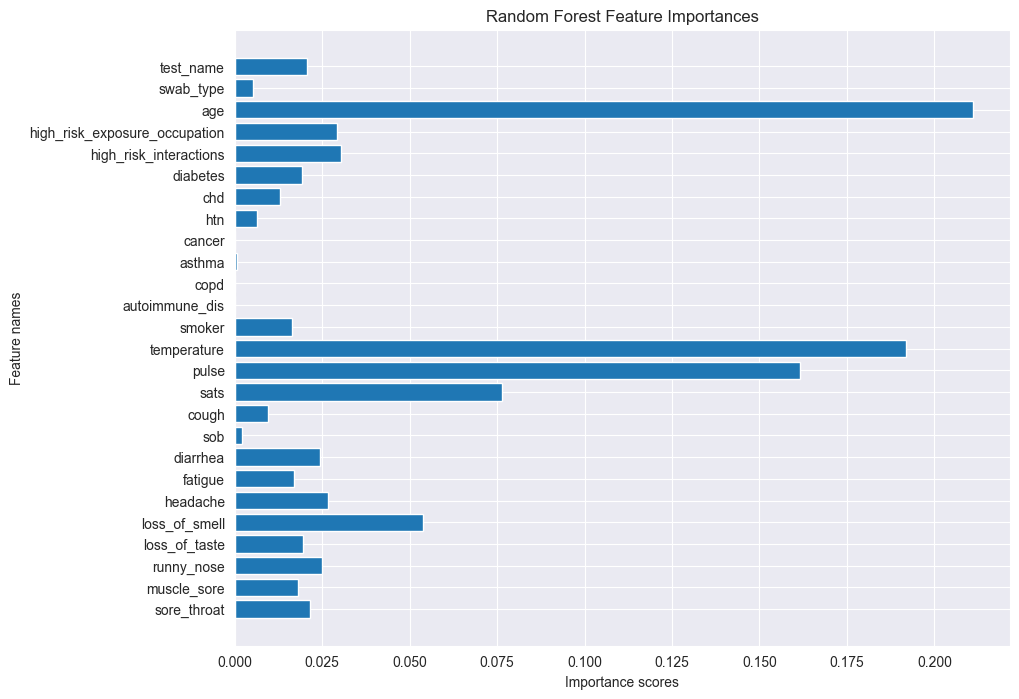

In [174]:
import matplotlib.pyplot as plt
n_features = X.shape[1]
plt.figure(figsize=(10,8))
plt.barh(range(n_features), covid_randomnessclf.feature_importances_, align="center")
plt.yticks(range(n_features), X.columns)
plt.xlabel("Importance scores")
plt.ylabel("Feature names")
plt.title("Random Forest Feature Importances")
plt.gca().invert_yaxis()
plt.show()


### Using Gradient Boosted classifier

In [175]:
from sklearn.ensemble import GradientBoostingClassifier
covid_gbc = GradientBoostingClassifier(random_state=42).fit(X_train, y_train)

In [176]:
print(f"Training set accuracy: {covid_gbc.score(X_train, y_train)}")
print(f"Generalizability: {covid_gbc.score(X_test, y_test)}")

Training set accuracy: 0.9981718464351006
Generalizability: 0.9956140350877193


 representing feature importance in the model

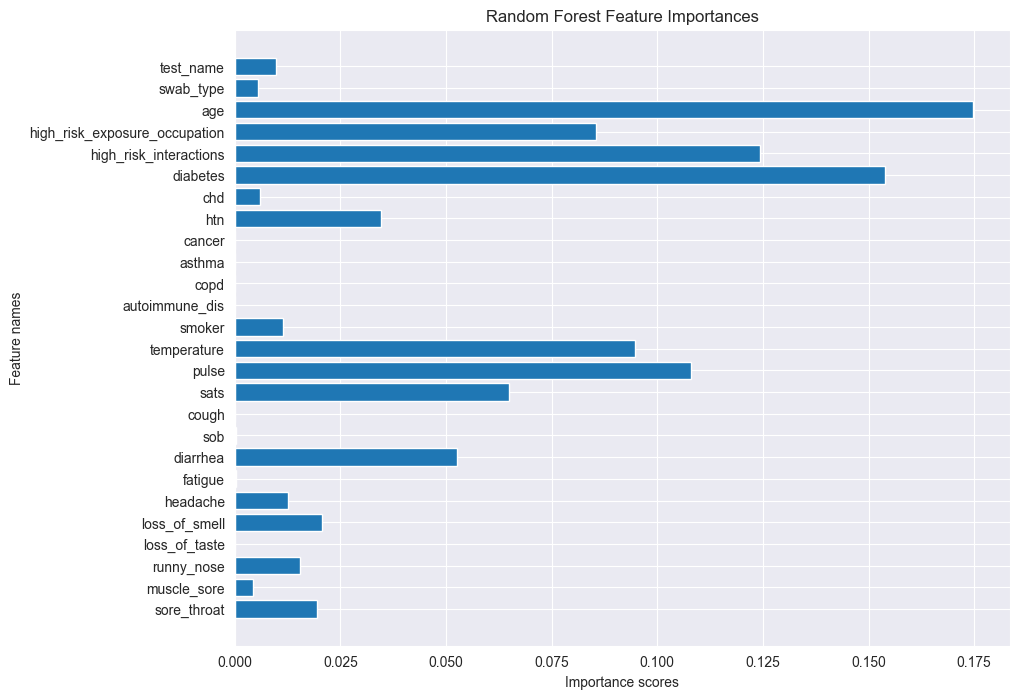

In [177]:
import matplotlib.pyplot as plt

n_features = X.shape[1]
plt.figure(figsize=(10,8))
plt.barh(range(n_features), covid_gbc.feature_importances_, align="center")
plt.yticks(range(n_features), X.columns)
plt.xlabel("Importance scores")
plt.ylabel("Feature names")
plt.title("Random Forest Feature Importances")
plt.gca().invert_yaxis()
plt.show()


## <span style="color:#F07900;">Model Evaluation and Comparative Insights</span>

Both the **Random Forest Classifier (RFC)** and the **Gradient Boosted Classifier (GBC)** achieved very high accuracy scores, indicating strong performance in predicting COVID-19 risk.

| Metric | Random Forest Classifier (RFC)  |Gradient Boosted Classifier (GBC) |
| :--- | :--- | :--- |
| **Training Set Accuracy** | 0.99872 | 0.99817 |
| **Generalizability (Test Set Accuracy)** | 0.99836 | 0.99561 |

---

### Comparative Analysis

* **Performance:** The **Random Forest Classifier** demonstrated slightly **better generalizability** (test set accuracy of 0.99836 vs. 0.99561) and a marginally higher training accuracy.
* **Overfitting:** Both models show a minimal difference between training and test accuracy, suggesting neither is significantly overfitting to the training data. The RFC has a slightly smaller gap, which, combined with its higher test score, suggests it's the *most* robust model in this comparison.
* **Conclusion:** Based purely on the given accuracy scores, the **Random Forest Classifier is the superior model** for this classification task.

---

## Feature Importance Analysis and Practical Implications

Feature importance analysis helps determine which inputs have the greatest influence on the model's prediction.


### Key Feature Importance (RFC & GBC)

The top features influencing the prediction vary slightly but generally highlight the critical diagnostic factors:

* **Random Forest Classifier (RFC)**:
    1.  **Age** (Highest importance)
    2.  **Temperature**
    3.  **Pulse**
    4.  **High-risk Interactions**
    5.  **Loss of Smell**
* **Gradient Boosted Classifier (GBC)**:
    1.  **Age** (Highest importance)
    2.  **High-risk Interactions**
    3.  **Diabetes**
    4.  **Temperature**
    5.  **Pulse**

---

### Practical Implications

The models' emphasis on certain features provides valuable real-world insight for resource allocation and medical screening:

1.  **Age as a Primary Risk Factor:** The fact that **age** is the most important feature in *both* models confirms its known significance as a critical factor in COVID-19 risk, likely reflecting its correlation with disease severity and general health status.
2.  **Interaction Risk:** The high importance of **high-risk interactions** in the GBC and moderate importance in the RFC suggests that a person's level of exposure is a major predictor of contracting the virus. This validates public health advice on minimizing contact and confirms the benefit of contact tracing.
3.  **Symptom and Vitals Significance:** **Temperature**, **pulse**, and the key symptom **loss of smell** are ranked highly, indicating that simple vital signs and classic symptomatic data are crucial for an accurate diagnosis. These metrics can be easily collected during a preliminary screening.
4.  **Comorbidity Impact:** The high importance of **diabetes** in the GBC shows that pre-existing conditions (comorbidities) are significant risk factors for predicting COVID-19 infection. This suggests that clinical prediction models should heavily weight patient medical history.

# <span style="color: #b0f542">Task 2:  Car Price Prediction with a Decision Tree </span>

### **Objective**
Predict automobile prices using the provided auto dataset.

### **Requirements**
- Train a Decision Tree Regressor for this task.
- Evaluate performance using metrics such as RMSE, R^2.
- Interpret the tree structure and discuss how different features contribute


In [4]:
df = pd.read_csv('datasets/Auto Dataset.csv', encoding='latin-1')
print("Original size:", df.shape)

Original size: (50000, 20)


In [5]:
df

,dateCrawled,name,seller,offerType,price,abtest,vehicleType,yearOfRegistration,gearbox,powerPS,model,odometer,monthOfRegistration,fuelType,brand,notRepairedDamage,dateCreated,nrOfPictures,postalCode,lastSeen
0,3/26/2016 17:47,Peugeot_807_160_NAVTECH_ON_BOARD,privat,Angebot,"$5,000",control,bus,2004,manuell,158,andere,"150,000km",3,lpg,peugeot,nein,3/26/2016 0:00,0,79588,4/6/2016 6:45
1,4/4/2016 13:38,BMW_740i_4_4_Liter_HAMANN_UMBAU_Mega_Optik,privat,Angebot,"$8,500",control,limousine,1997,automatik,286,7er,"150,000km",6,benzin,bmw,nein,4/4/2016 0:00,0,71034,4/6/2016 14:45
2,3/26/2016 18:57,Volkswagen_Golf_1.6_United,privat,Angebot,"$8,990",test,limousine,2009,manuell,102,golf,"70,000km",7,benzin,volkswagen,nein,3/26/2016 0:00,0,35394,4/6/2016 20:15
3,3/12/2016 16:58,Smart_smart_fortwo_coupe_softouch/F1/Klima/Pan...,privat,Angebot,"$4,350",control,kleinwagen,2007,automatik,71,fortwo,"70,000km",6,benzin,smart,nein,3/12/2016 0:00,0,33729,3/15/2016 3:16
4,4/1/2016 14:38,Ford_Focus_1_6_Benzin_TÜV_neu_ist_sehr_gepfleg...,privat,Angebot,"$1,350",test,kombi,2003,manuell,0,focus,"150,000km",7,benzin,ford,nein,4/1/2016 0:00,0,39218,4/1/2016 14:38
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,3/27/2016 14:38,Audi_Q5_3.0_TDI_qu._S_tr.__Navi__Panorama__Xenon,privat,Angebot,"$24,900",control,limousine,2011,automatik,239,q5,"100,000km",1,diesel,audi,nein,3/27/2016 0:00,0,82131,4/1/2016 13:47
49996,3/28/2016 10:50,Opel_Astra_F_Cabrio_Bertone_Edition___TÜV_neu+...,privat,Angebot,"$1,980",control,cabrio,1996,manuell,75,astra,"150,000km",5,benzin,opel,nein,3/28/2016 0:00,0,44807,4/2/2016 14:18
49997,4/2/2016 14:44,Fiat_500_C_1.2_Dualogic_Lounge,privat,Angebot,"$13,200",test,cabrio,2014,automatik,69,500,"5,000km",11,benzin,fiat,nein,4/2/2016 0:00,0,73430,4/4/2016 11:47
49998,3/8/2016 19:25,Audi_A3_2.0_TDI_Sportback_Ambition,privat,Angebot,"$22,900",control,kombi,2013,manuell,150,a3,"40,000km",11,diesel,audi,nein,3/8/2016 0:00,0,35683,4/5/2016 16:45


In [6]:
df.columns

Index(['dateCrawled', 'name', 'seller', 'offerType', 'price', 'abtest',
       'vehicleType', 'yearOfRegistration', 'gearbox', 'powerPS', 'model',
       'odometer', 'monthOfRegistration', 'fuelType', 'brand',
       'notRepairedDamage', 'dateCreated', 'nrOfPictures', 'postalCode',
       'lastSeen'],
      dtype='object')

### Clean the Price Column
Remove currency symbols and commas, then convert values to numeric.


In [7]:
df['price'] = df['price'].astype(str).str.replace('$', '', regex=False).str.replace(',', '', regex=False)
df['price'] = pd.to_numeric(df['price'])

In [8]:
df.tail()

,dateCrawled,name,seller,offerType,price,abtest,vehicleType,yearOfRegistration,gearbox,powerPS,model,odometer,monthOfRegistration,fuelType,brand,notRepairedDamage,dateCreated,nrOfPictures,postalCode,lastSeen
49995,3/27/2016 14:38,Audi_Q5_3.0_TDI_qu._S_tr.__Navi__Panorama__Xenon,privat,Angebot,24900,control,limousine,2011,automatik,239,q5,"100,000km",1,diesel,audi,nein,3/27/2016 0:00,0,82131,4/1/2016 13:47
49996,3/28/2016 10:50,Opel_Astra_F_Cabrio_Bertone_Edition___TÜV_neu+...,privat,Angebot,1980,control,cabrio,1996,manuell,75,astra,"150,000km",5,benzin,opel,nein,3/28/2016 0:00,0,44807,4/2/2016 14:18
49997,4/2/2016 14:44,Fiat_500_C_1.2_Dualogic_Lounge,privat,Angebot,13200,test,cabrio,2014,automatik,69,500,"5,000km",11,benzin,fiat,nein,4/2/2016 0:00,0,73430,4/4/2016 11:47
49998,3/8/2016 19:25,Audi_A3_2.0_TDI_Sportback_Ambition,privat,Angebot,22900,control,kombi,2013,manuell,150,a3,"40,000km",11,diesel,audi,nein,3/8/2016 0:00,0,35683,4/5/2016 16:45
49999,3/14/2016 0:42,Opel_Vectra_1.6_16V,privat,Angebot,1250,control,limousine,1996,manuell,101,vectra,"150,000km",1,benzin,opel,nein,3/13/2016 0:00,0,45897,4/6/2016 21:18


### Clean the Odometer Column
Remove "km" and commas, then convert values to numeric.


In [9]:
df['odometer'] = df['odometer'].astype(str).str.replace('km', '', regex=False).str.replace(',', '', regex=False)
df['odometer'] = pd.to_numeric(df['odometer'])


In [10]:
df

,dateCrawled,name,seller,offerType,price,abtest,vehicleType,yearOfRegistration,gearbox,powerPS,model,odometer,monthOfRegistration,fuelType,brand,notRepairedDamage,dateCreated,nrOfPictures,postalCode,lastSeen
0,3/26/2016 17:47,Peugeot_807_160_NAVTECH_ON_BOARD,privat,Angebot,5000,control,bus,2004,manuell,158,andere,150000,3,lpg,peugeot,nein,3/26/2016 0:00,0,79588,4/6/2016 6:45
1,4/4/2016 13:38,BMW_740i_4_4_Liter_HAMANN_UMBAU_Mega_Optik,privat,Angebot,8500,control,limousine,1997,automatik,286,7er,150000,6,benzin,bmw,nein,4/4/2016 0:00,0,71034,4/6/2016 14:45
2,3/26/2016 18:57,Volkswagen_Golf_1.6_United,privat,Angebot,8990,test,limousine,2009,manuell,102,golf,70000,7,benzin,volkswagen,nein,3/26/2016 0:00,0,35394,4/6/2016 20:15
3,3/12/2016 16:58,Smart_smart_fortwo_coupe_softouch/F1/Klima/Pan...,privat,Angebot,4350,control,kleinwagen,2007,automatik,71,fortwo,70000,6,benzin,smart,nein,3/12/2016 0:00,0,33729,3/15/2016 3:16
4,4/1/2016 14:38,Ford_Focus_1_6_Benzin_TÜV_neu_ist_sehr_gepfleg...,privat,Angebot,1350,test,kombi,2003,manuell,0,focus,150000,7,benzin,ford,nein,4/1/2016 0:00,0,39218,4/1/2016 14:38
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,3/27/2016 14:38,Audi_Q5_3.0_TDI_qu._S_tr.__Navi__Panorama__Xenon,privat,Angebot,24900,control,limousine,2011,automatik,239,q5,100000,1,diesel,audi,nein,3/27/2016 0:00,0,82131,4/1/2016 13:47
49996,3/28/2016 10:50,Opel_Astra_F_Cabrio_Bertone_Edition___TÜV_neu+...,privat,Angebot,1980,control,cabrio,1996,manuell,75,astra,150000,5,benzin,opel,nein,3/28/2016 0:00,0,44807,4/2/2016 14:18
49997,4/2/2016 14:44,Fiat_500_C_1.2_Dualogic_Lounge,privat,Angebot,13200,test,cabrio,2014,automatik,69,500,5000,11,benzin,fiat,nein,4/2/2016 0:00,0,73430,4/4/2016 11:47
49998,3/8/2016 19:25,Audi_A3_2.0_TDI_Sportback_Ambition,privat,Angebot,22900,control,kombi,2013,manuell,150,a3,40000,11,diesel,audi,nein,3/8/2016 0:00,0,35683,4/5/2016 16:45


### Filter Out Extreme or Invalid Values
Remove unrealistic prices and power outputs.


In [11]:
df = df[(df['price'] > 100) & (df['price'] < 200000)]
df = df[(df['powerPS'] > 10) & (df['powerPS'] < 1000)]

In [12]:
df

,dateCrawled,name,seller,offerType,price,abtest,vehicleType,yearOfRegistration,gearbox,powerPS,model,odometer,monthOfRegistration,fuelType,brand,notRepairedDamage,dateCreated,nrOfPictures,postalCode,lastSeen
0,3/26/2016 17:47,Peugeot_807_160_NAVTECH_ON_BOARD,privat,Angebot,5000,control,bus,2004,manuell,158,andere,150000,3,lpg,peugeot,nein,3/26/2016 0:00,0,79588,4/6/2016 6:45
1,4/4/2016 13:38,BMW_740i_4_4_Liter_HAMANN_UMBAU_Mega_Optik,privat,Angebot,8500,control,limousine,1997,automatik,286,7er,150000,6,benzin,bmw,nein,4/4/2016 0:00,0,71034,4/6/2016 14:45
2,3/26/2016 18:57,Volkswagen_Golf_1.6_United,privat,Angebot,8990,test,limousine,2009,manuell,102,golf,70000,7,benzin,volkswagen,nein,3/26/2016 0:00,0,35394,4/6/2016 20:15
3,3/12/2016 16:58,Smart_smart_fortwo_coupe_softouch/F1/Klima/Pan...,privat,Angebot,4350,control,kleinwagen,2007,automatik,71,fortwo,70000,6,benzin,smart,nein,3/12/2016 0:00,0,33729,3/15/2016 3:16
5,3/21/2016 13:47,Chrysler_Grand_Voyager_2.8_CRD_Aut.Limited_Sto...,privat,Angebot,7900,test,bus,2006,automatik,150,voyager,150000,4,diesel,chrysler,NaN,3/21/2016 0:00,0,22962,4/6/2016 9:45
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,3/27/2016 14:38,Audi_Q5_3.0_TDI_qu._S_tr.__Navi__Panorama__Xenon,privat,Angebot,24900,control,limousine,2011,automatik,239,q5,100000,1,diesel,audi,nein,3/27/2016 0:00,0,82131,4/1/2016 13:47
49996,3/28/2016 10:50,Opel_Astra_F_Cabrio_Bertone_Edition___TÜV_neu+...,privat,Angebot,1980,control,cabrio,1996,manuell,75,astra,150000,5,benzin,opel,nein,3/28/2016 0:00,0,44807,4/2/2016 14:18
49997,4/2/2016 14:44,Fiat_500_C_1.2_Dualogic_Lounge,privat,Angebot,13200,test,cabrio,2014,automatik,69,500,5000,11,benzin,fiat,nein,4/2/2016 0:00,0,73430,4/4/2016 11:47
49998,3/8/2016 19:25,Audi_A3_2.0_TDI_Sportback_Ambition,privat,Angebot,22900,control,kombi,2013,manuell,150,a3,40000,11,diesel,audi,nein,3/8/2016 0:00,0,35683,4/5/2016 16:45


### Drop Columns Not Needed for Modeling
These columns add noise or leakage and should be removed.

In [13]:
drop_cols = ['dateCrawled', 'name', 'dateCreated', 'lastSeen', 'postalCode', 'nrOfPictures', 'seller', 'offerType']
df_model = df.drop(columns=drop_cols)

### Fill Missing Categorical Values
Replace missing values in categorical columns with 'unknown'.

In [15]:
categorical_cols = ['vehicleType', 'gearbox', 'model', 'fuelType', 'brand', 'notRepairedDamage', 'abtest']
for col in categorical_cols:
    df_model[col] = df_model[col].fillna('unknown')

### Encode Categorical Variables
Convert text categories into numeric codes using Label Encoding.


In [17]:
from sklearn.preprocessing import LabelEncoder

label_encoders = {}
for col in categorical_cols:
    le = LabelEncoder()
    df_model[col] = le.fit_transform(df_model[col].astype(str))
    label_encoders[col] = le

print("Cleaned size:", df_model.shape)

Cleaned size: (43242, 12)


### Split Data Into Training and Test Sets
Separate the features (X) and target (price), then create train/test splits.
encoding notRepairedDamages and brand

In [18]:
X = df_model.drop('price', axis=1)
y = df_model['price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

### Train a Decision Tree Regressor
Use a maximum depth of 4 to avoid overfitting.
converting price into integer values

In [19]:
dt_regressor = DecisionTreeRegressor(random_state=42, max_depth=4)
dt_regressor.fit(X_train, y_train)

,criterion,'squared_error'
,splitter,'best'
,max_depth,4
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,42
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,ccp_alpha,0.0


### Evaluate the Model
Calculate RMSE and R² to measure prediction quality.


In [20]:
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

y_pred = dt_regressor.predict(X_test)

rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print(f"\n--- Model Performance ---")
print(f"Root Mean Squared Error (RMSE): ${rmse:.2f}")
print(f"R-squared (R^2): {r2:.4f}")



--- Model Performance ---
Root Mean Squared Error (RMSE): $5472.23
R-squared (R^2): 0.5824


removing car price noise

### Plot Feature Importance
Visualize which features most strongly influence the predicted price.


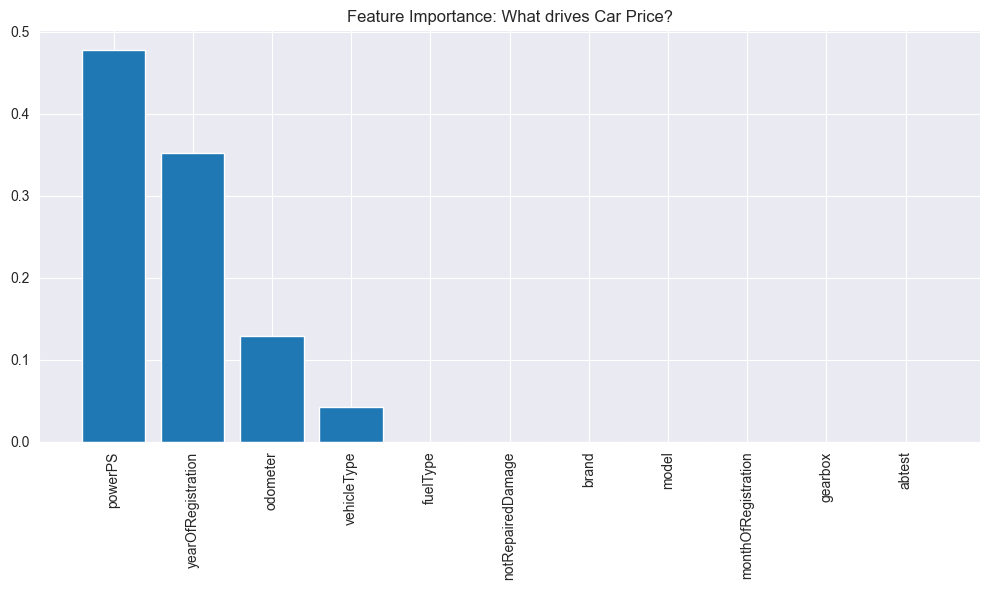

In [21]:
importances = dt_regressor.feature_importances_
indices = np.argsort(importances)[::-1]
feature_names = X.columns

plt.figure(figsize=(10, 6))
plt.title("Feature Importance: What drives Car Price?")
plt.bar(range(X.shape[1]), importances[indices], align="center")
plt.xticks(range(X.shape[1]), feature_names[indices], rotation=90)
plt.tight_layout()
plt.show()

### Visualize the Decision Tree Logic
Plot the learned decision tree to see how the model makes predictions.


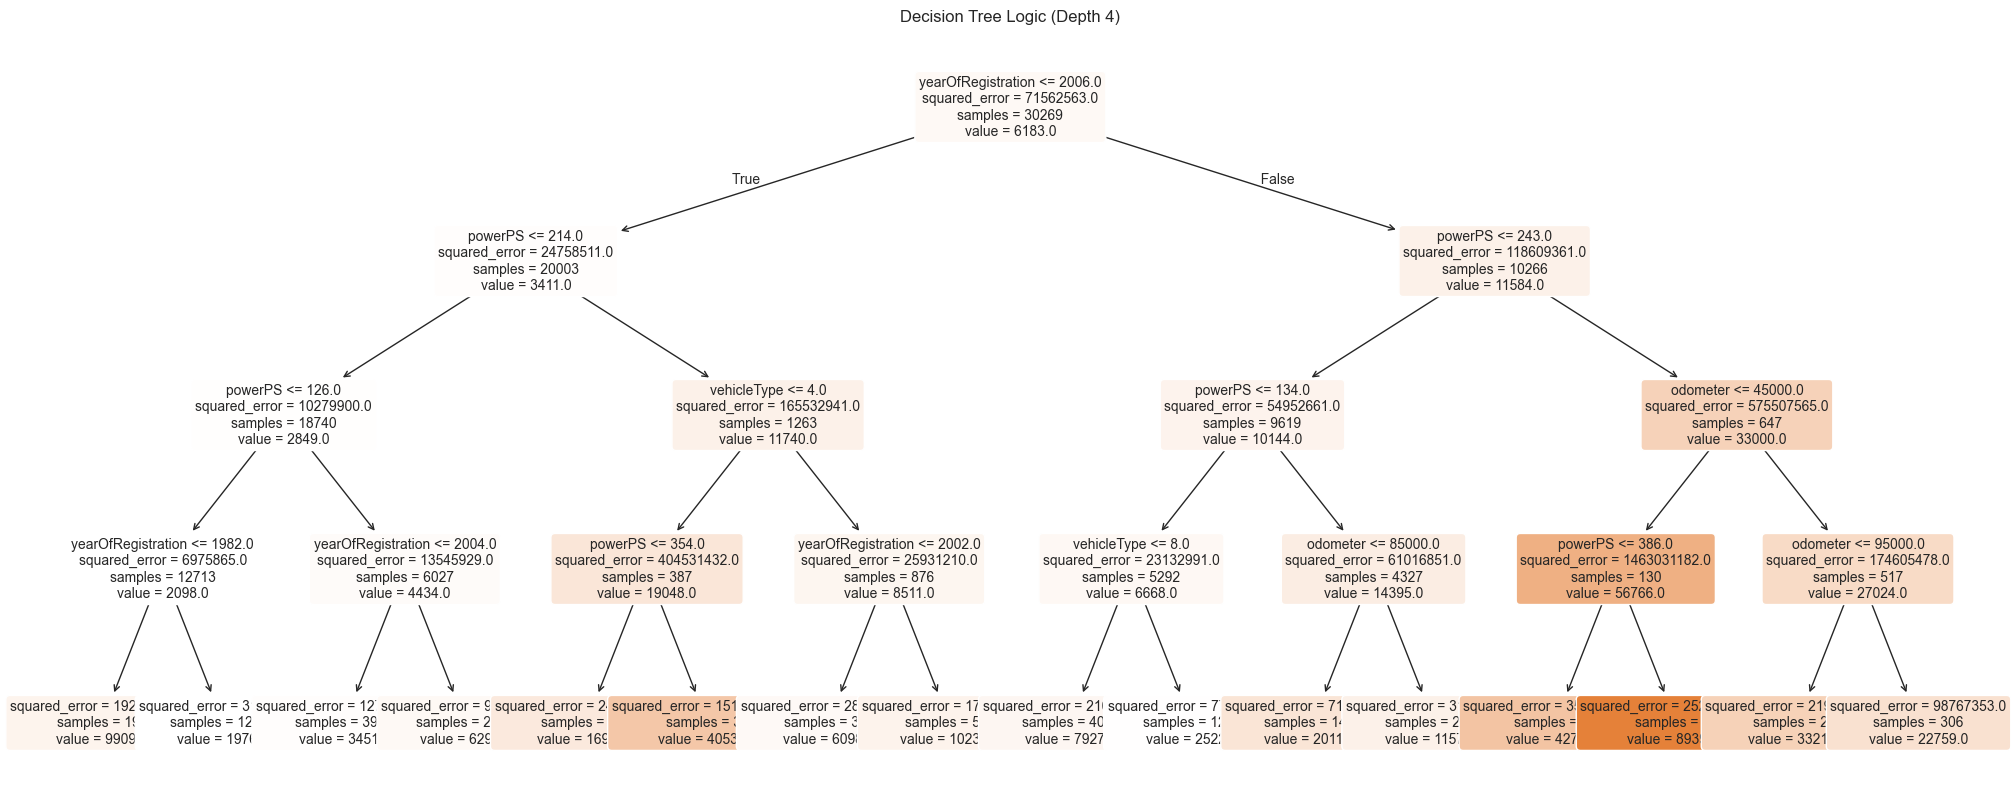

In [23]:
from sklearn.tree import plot_tree

plt.figure(figsize=(25, 10))
plot_tree(dt_regressor,
          feature_names=X.columns,
          filled=True,
          rounded=True,
          fontsize=10,
          precision=0)
plt.title("Decision Tree Logic (Depth 4)")
plt.show()

## Discussion
- Root split: the tree uses the single most important feature (see plotted importances) to partition the dataset into broad price groups — that feature drives the largest change in predicted price.
- Internal splits: subsequent nodes refine those groups using features with next-highest importances (typical ones: `powerPS`, `odometer`, `yearOfRegistration`/age, `brand`, `vehicleType`, `gearbox`, `notRepairedDamage`), creating simple decision rules like “if `brand` is X and `odometer` < Y then higher price.”
- Feature effects (how to read them): higher `powerPS`, newer year / lower age, lower `odometer` (mileage), desirable `brand`, `automatic` gearbox and `notRepairedDamage == no` push predictions up; opposite values push predictions down.
- Interactions: splits combine features (e.g., brand × mileage) so the same `powerPS` can have different effects depending on `brand` or `age`.
- Model complexity: `max_depth=4` yields shallow, human‑readable rules (few leaves) — interpretable but may miss fine-grained patterns, explaining moderate R² / RMSE.